# **Shopping Trend Insights-EDA**

Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

Objectives-Marketing Strategies
1. Optimize product offerings
2. Enhancing customer satisfaction

Attribute Data

1. Customer ID - Unique identifier for each
customer.
2. Age - Age of the customer.
3. Gender - Gender of the customer (Male/Female).
4. Item Purchased - The item purchased by the customer.
5. Category - Category of the item purchased.
6. Purchase Amount (USD) - The amount of the purchase in USD.
7. Location - Location where the purchase was made.
8. Size - Size of the purchased item.
9. Color - Color of the purchased item.
10. Season - Season during which the purchase was made.
11. Review Rating - Rating given by the customer for the purchased item.
12. Subscription Status - Indicates if the customer has a subscription (Yes/No).
13. Shipping Type - Type of shipping chosen by the customer.
14. Discount Applied - Indicates if a discount was applied to the purchase (Yes/No).
15. Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No).
16. Previous Purchases - Number of previous purchases made by the customer.
17. Payment Method - Customer's most preferred payment method.
18. Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)




# Exploratory data Analysis-EDA

In [3]:
import pandas as pd
pd.options.display.float_format='{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]


In [4]:
from google.colab import files
data = files.upload()

Saving shopping_trends_updated.csv to shopping_trends_updated.csv


In [5]:
df=pd.read_csv('shopping_trends_updated.csv')
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
842,843,59,Male,Shirt,Clothing,87,Missouri,M,Violet,Spring,3.60,Yes,Express,Yes,Yes,25,PayPal,Weekly
2053,2054,19,Male,Sunglasses,Accessories,60,Wyoming,S,Purple,Spring,4.50,No,2-Day Shipping,No,No,16,Credit Card,Fortnightly
2770,2771,50,Female,Boots,Footwear,44,Nebraska,S,Blue,Fall,3.30,No,Express,No,No,22,Bank Transfer,Quarterly
3732,3733,36,Female,Shoes,Footwear,92,Indiana,L,Pink,Spring,3.30,No,Free Shipping,No,No,28,PayPal,Annually
2736,2737,44,Female,Hoodie,Clothing,25,Montana,M,Pink,Spring,4.80,No,Store Pickup,No,No,45,Credit Card,Annually


In [6]:
#identify the shape of data
df.shape

(3900, 18)

The data cointains 18 clumns and 3900 rows

In [7]:
#identify the numbercolumns of the dataset
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [9]:
#identify the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

There are 13 object datatype, 4 int datatype and one float. There is no missing value

In [10]:
#identify the statistics of the dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [11]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

There is no missing value


In [13]:
#check if there are duplicate
df.duplicated().sum()

0

There are no duplicate values in the dataset

# Check the distribution of Gender Variable

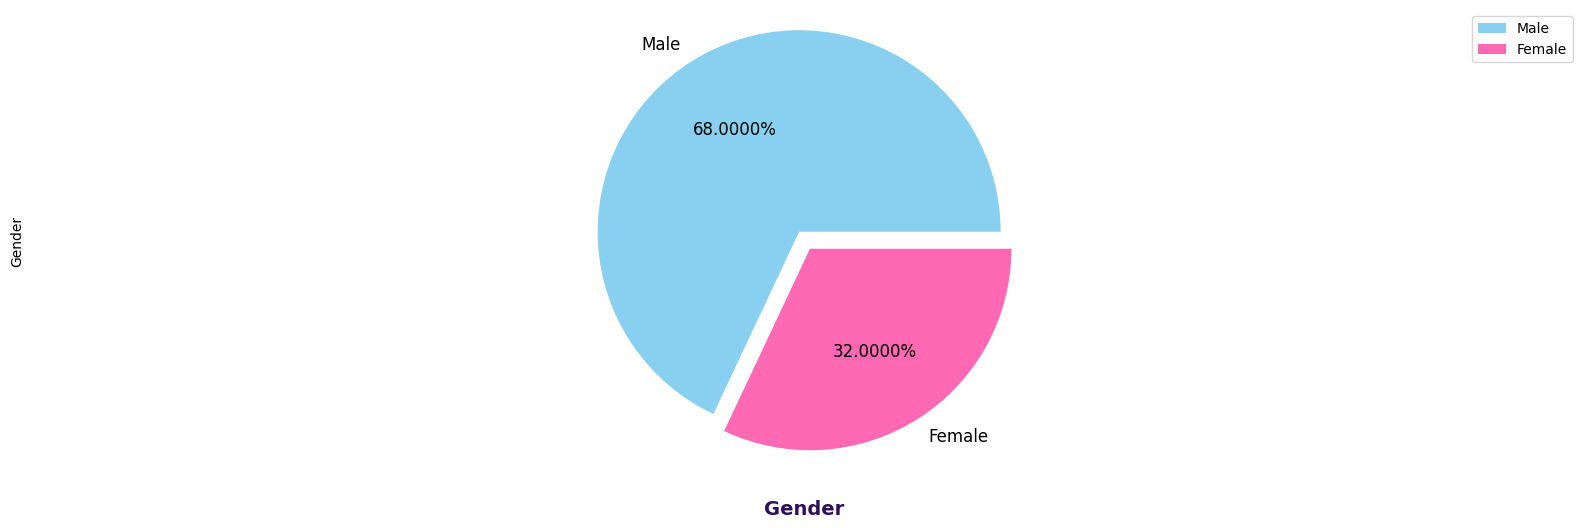

In [14]:
plt.figure(figsize=(20, 6))
counts = df["Gender"].value_counts()
explode=(0, 0.1)

counts.plot(kind='pie', fontsize=12, colors=colors, explode=explode, autopct='%1.4f%%')
plt.xlabel('Gender', weight='bold', color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc='best')
plt.show()

The Gender distribution:
1. 68% Male
2. 32% Female

# Distribution of Age Variable

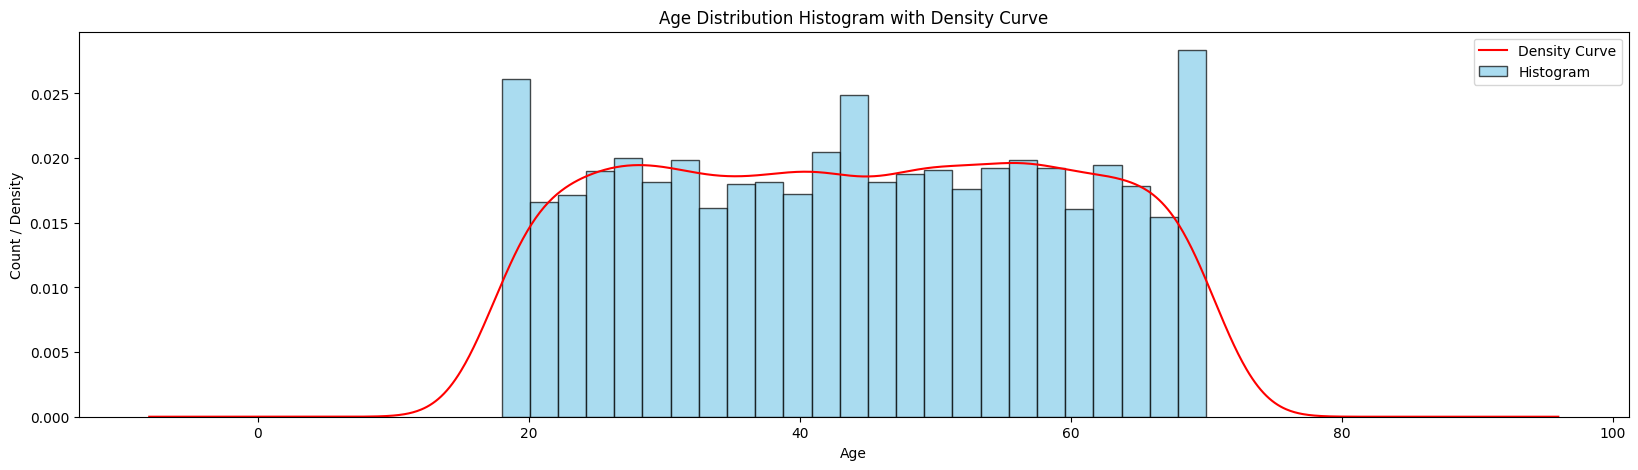

In [15]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

The distribution of age:
1. age range 18-75
2. mode: 18, 43-45, 73-75

# The distribution of product category

[Text(0, 0, 'Clothing'),
 Text(1, 0, 'Accessories'),
 Text(2, 0, 'Footwear'),
 Text(3, 0, 'Outerwear')]

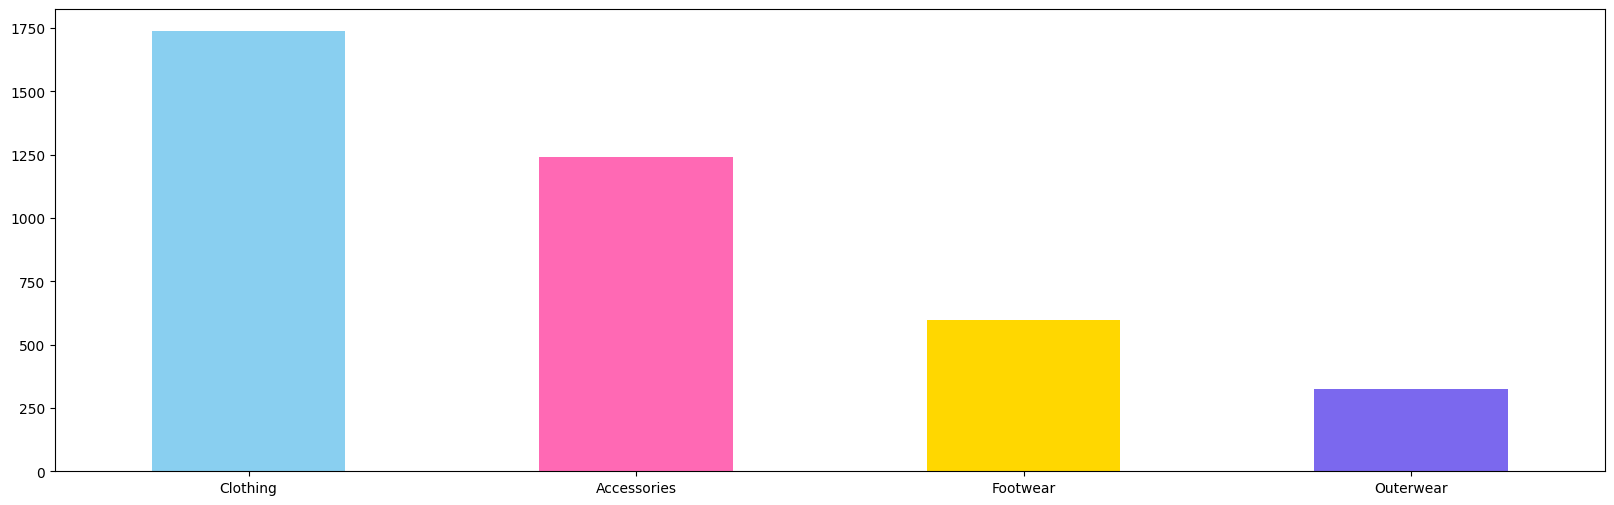

In [16]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))


Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324

# Find the number of Item Purchased

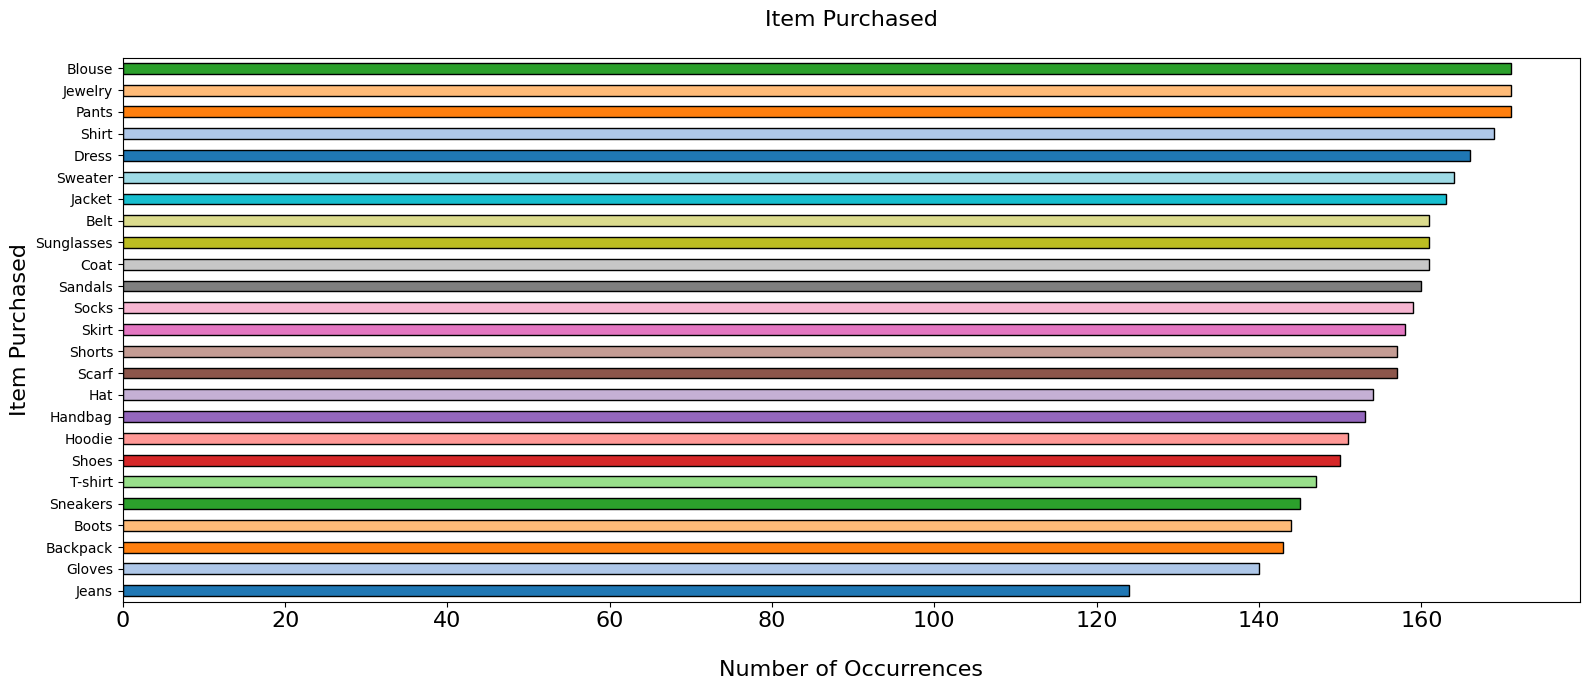

In [17]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

The most item purchased is Blouse and the least is Jeans

# Location distribution of the Customers

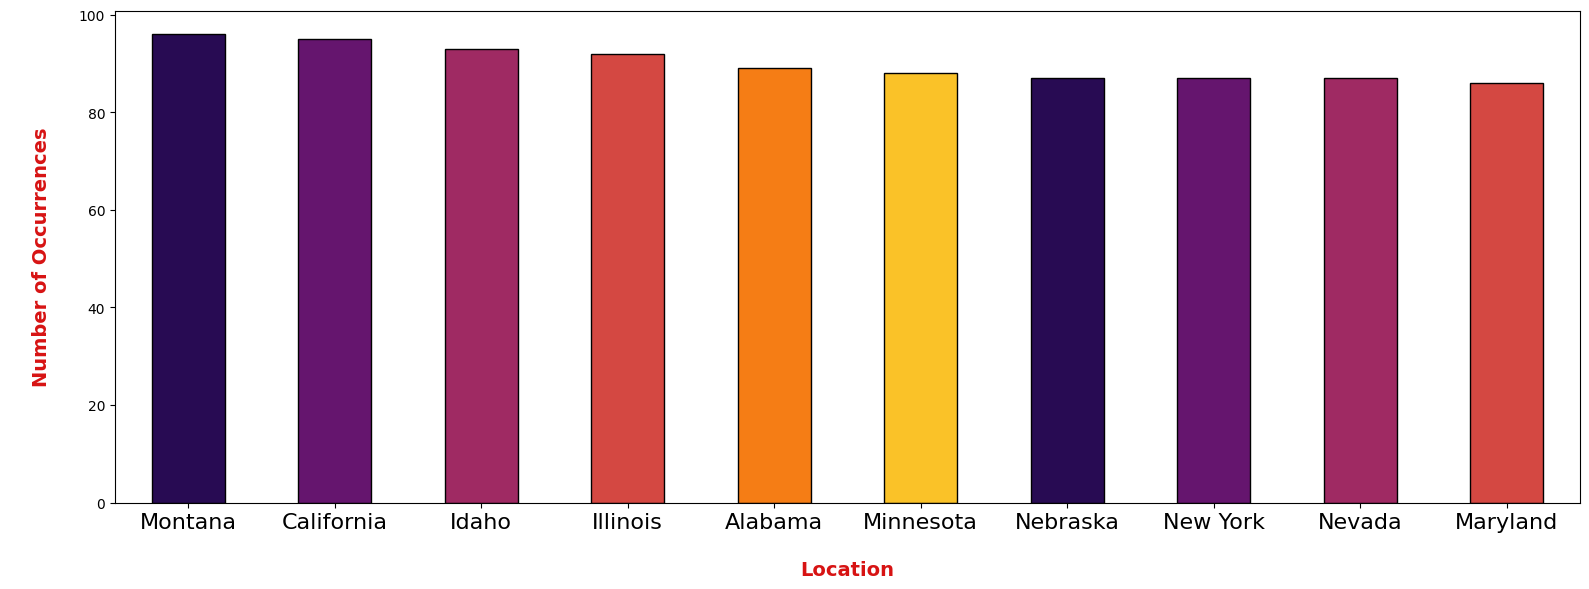

In [18]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

# The distribution size of the sold product

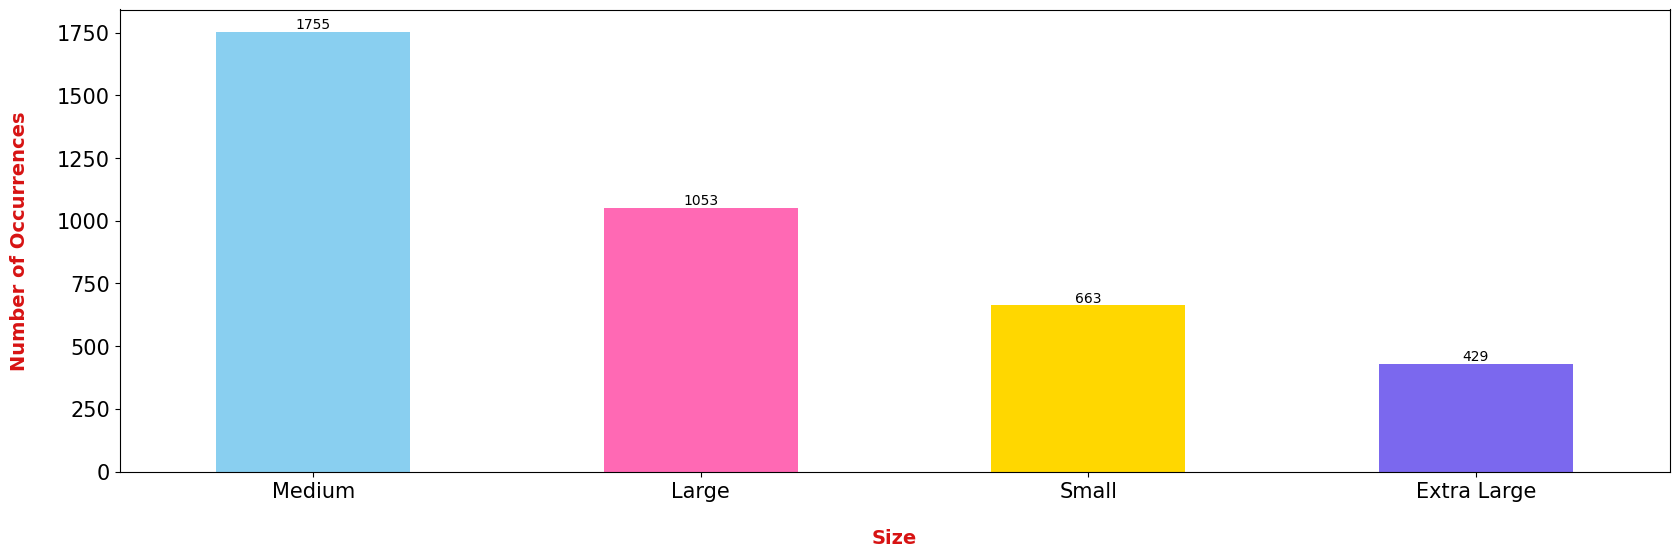

In [19]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# What are the top 10 color of the sold product?

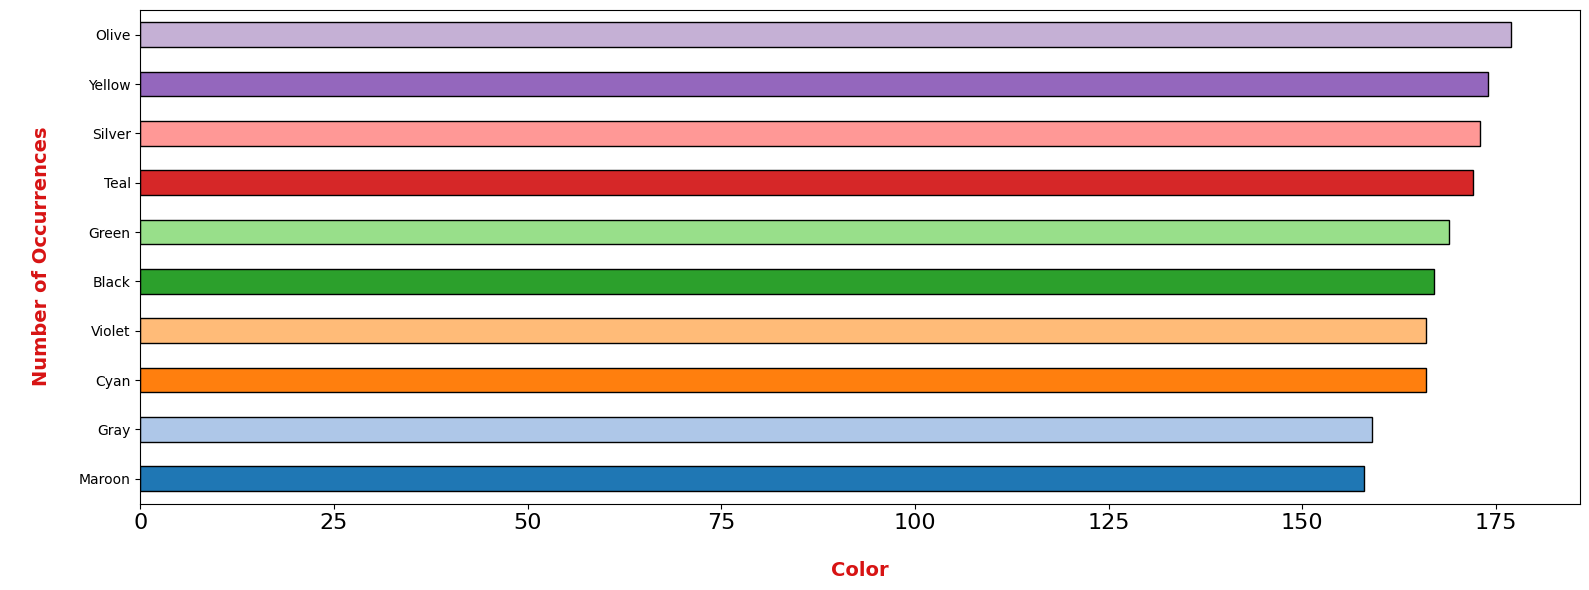

In [20]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

# The distribution of the season of the product sales

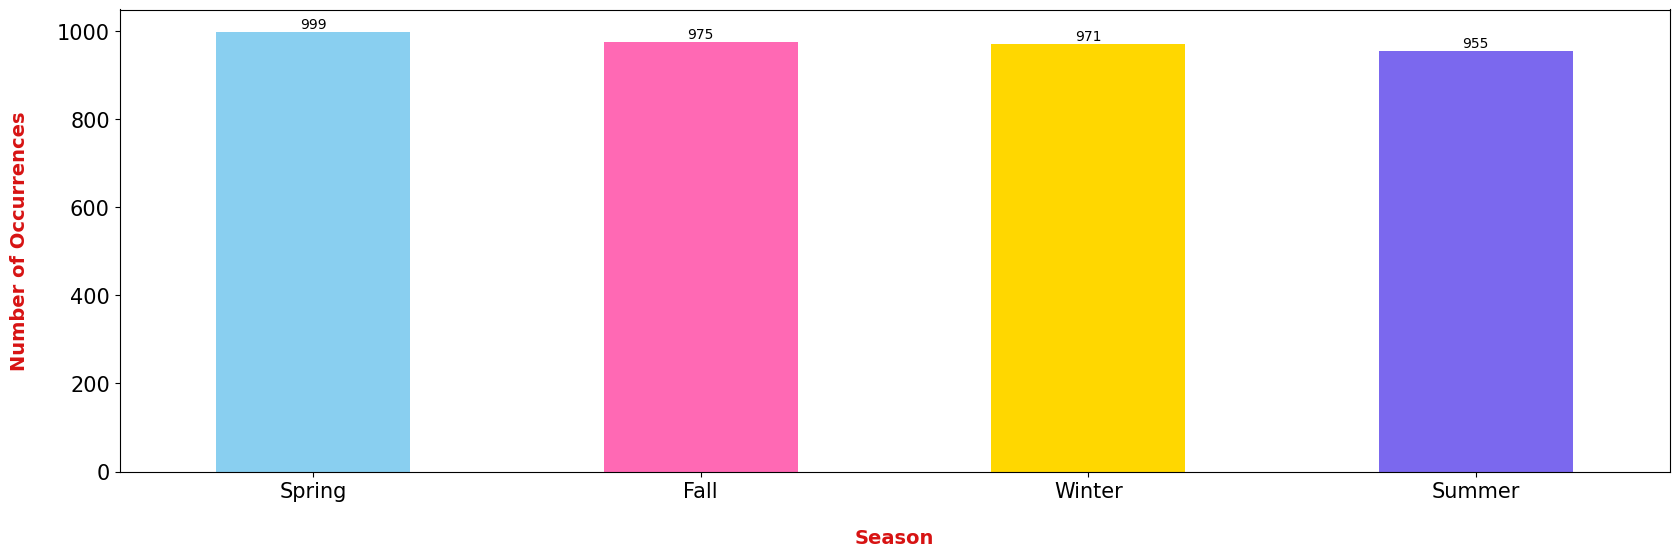

In [21]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

Season
Spring    999
Fall      975
Winter    971
Summer    955

# The distribution of subscription status

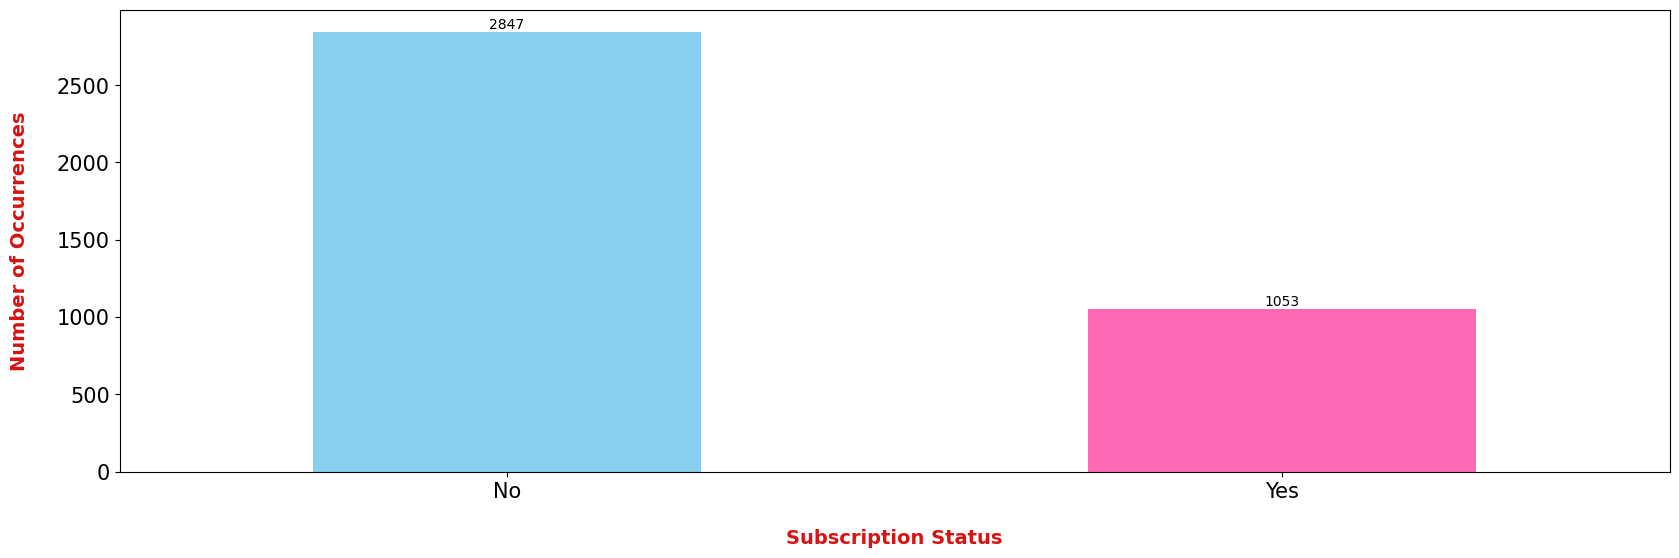

In [22]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# The distribution of payment method

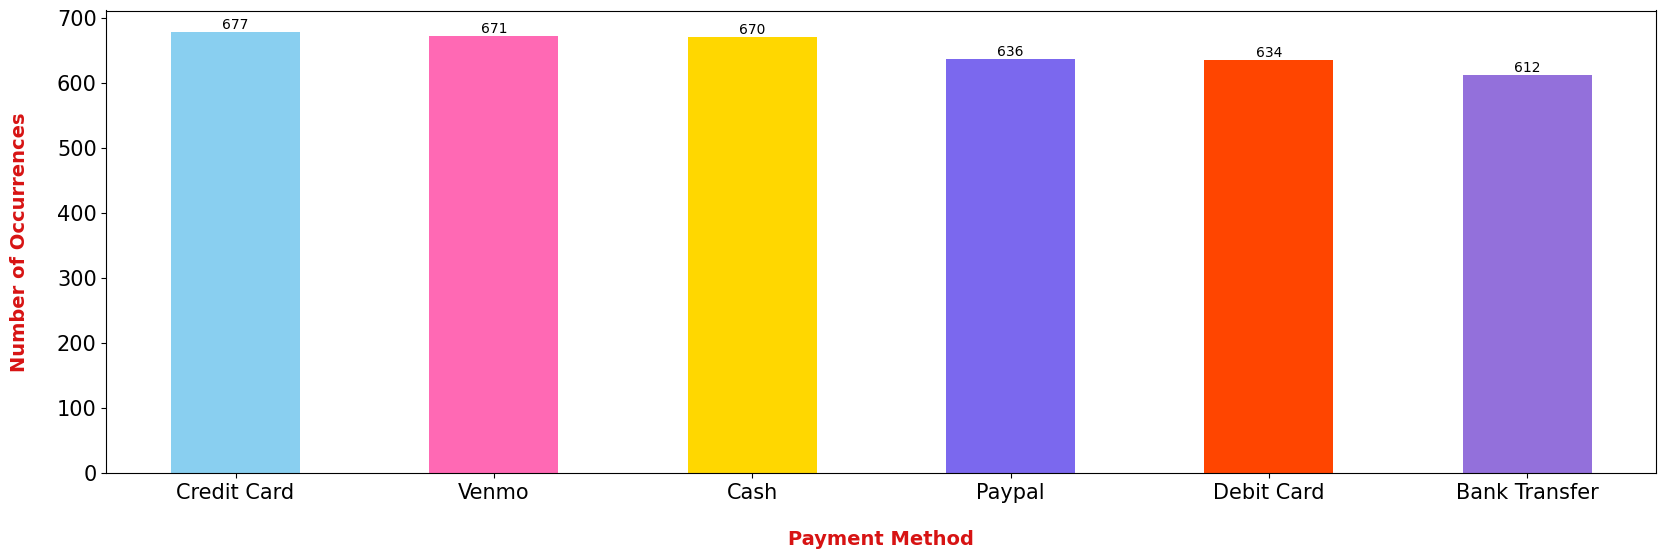

In [23]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# The distribution of Shipping method

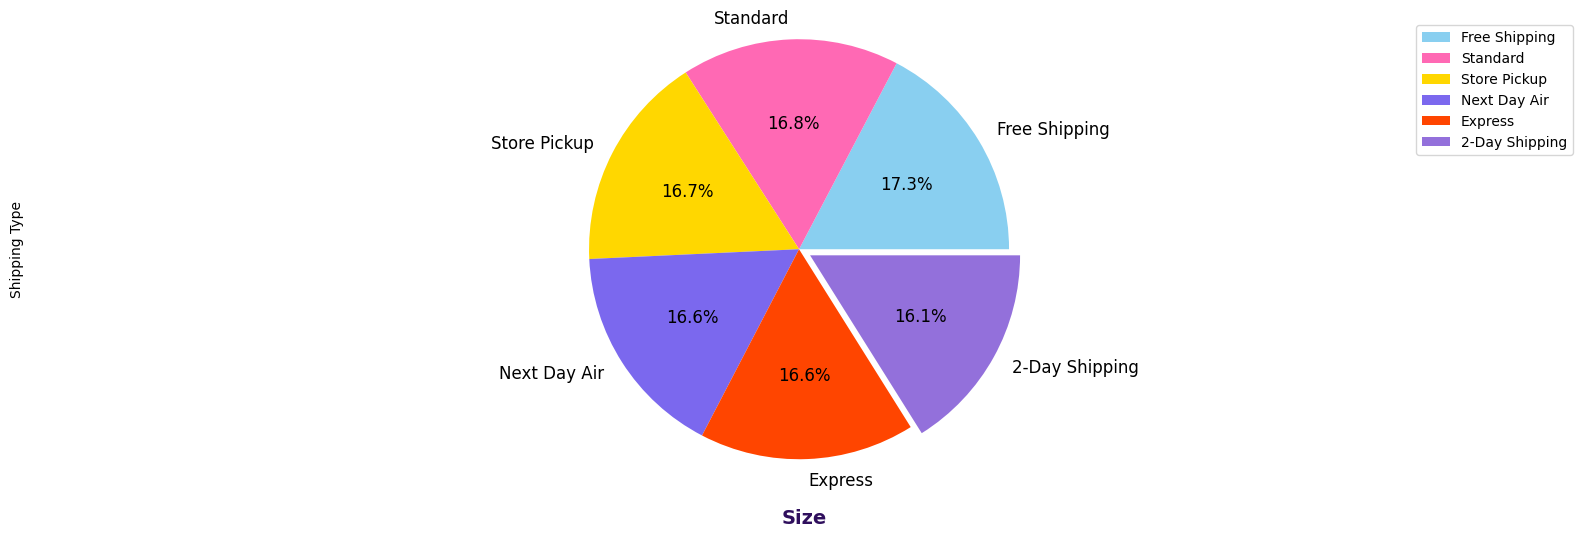

In [25]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612

# Analyze the frequency Purchases

In [27]:
df["Frequency of Purchases"].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

# Subscription Status by Gender

<Figure size 2000x600 with 0 Axes>

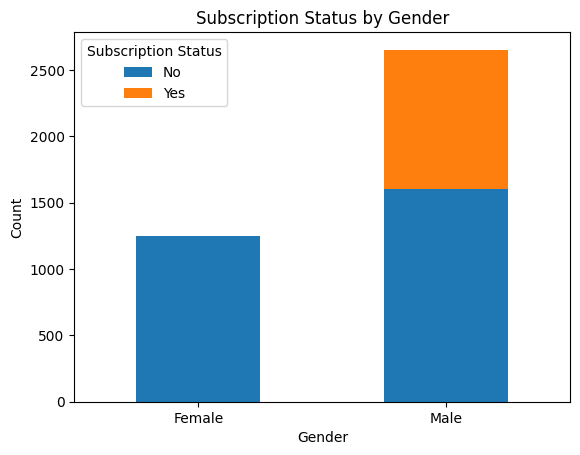

In [28]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

# Category Item Purchased by Gender

<Figure size 2000x600 with 0 Axes>

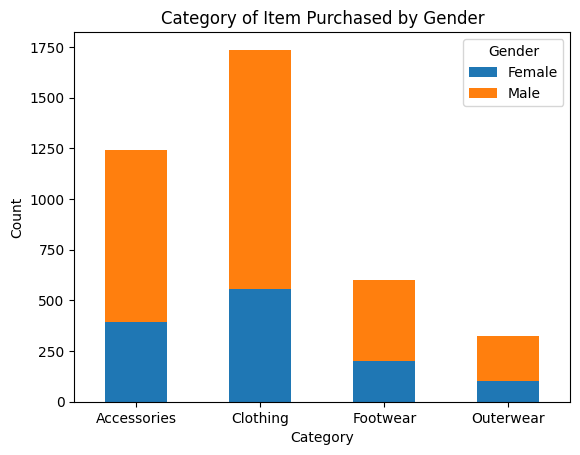

In [33]:
subscription_gender_counts = df.groupby(['Category', 'Gender']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Category of Item Purchased by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show();

Female dominate the purchase of items across all categories

# Payment Method by Gender

<Figure size 2000x600 with 0 Axes>

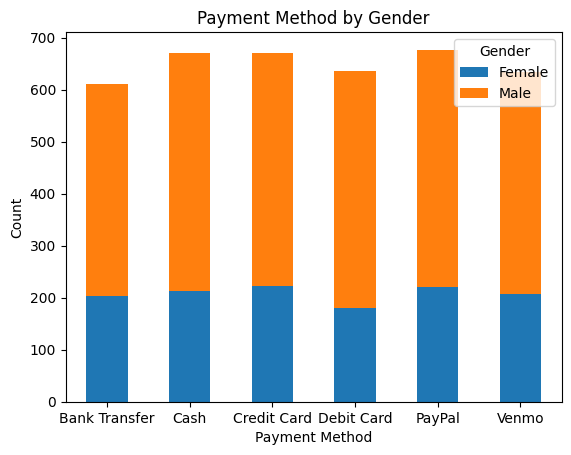

In [35]:
subscription_gender_counts = df.groupby(['Payment Method', 'Gender']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Payment Method by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show();

For all payment methods performed, they are predominantly dominated by female customers

# Rating by Category

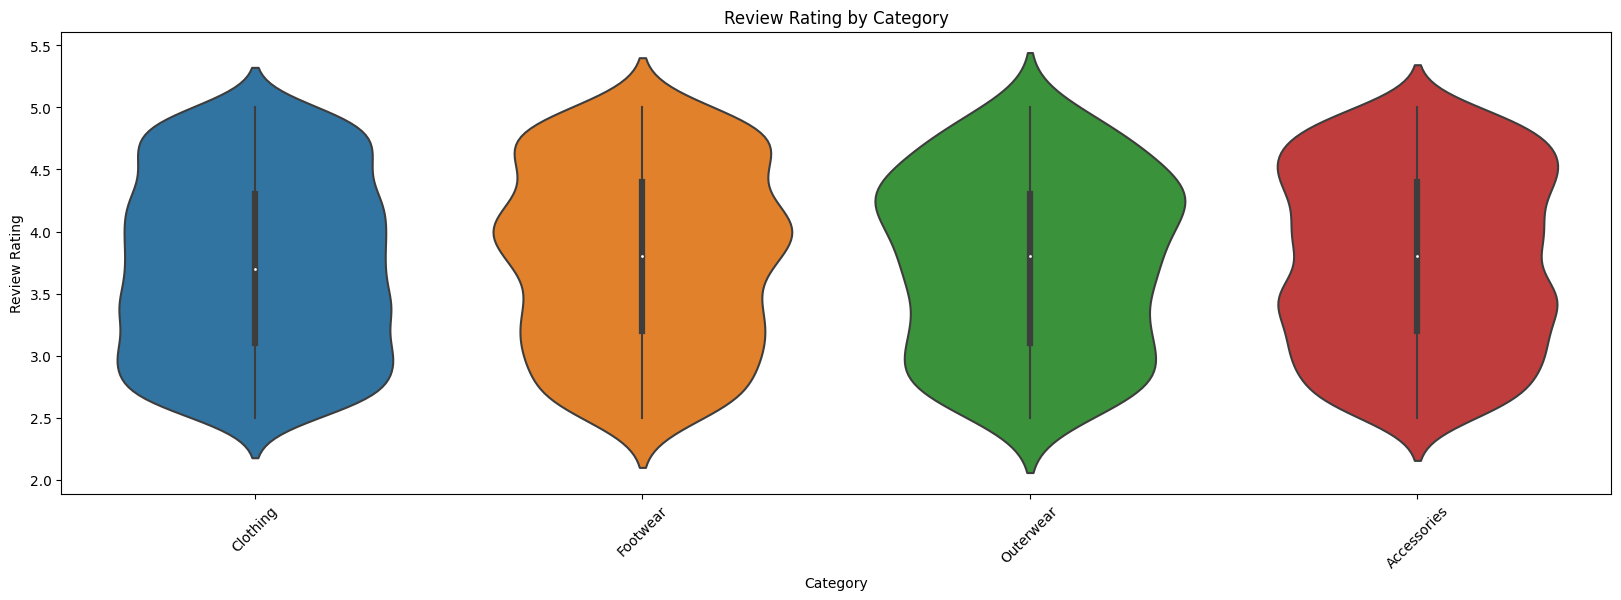

In [30]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

# Payment method by Season

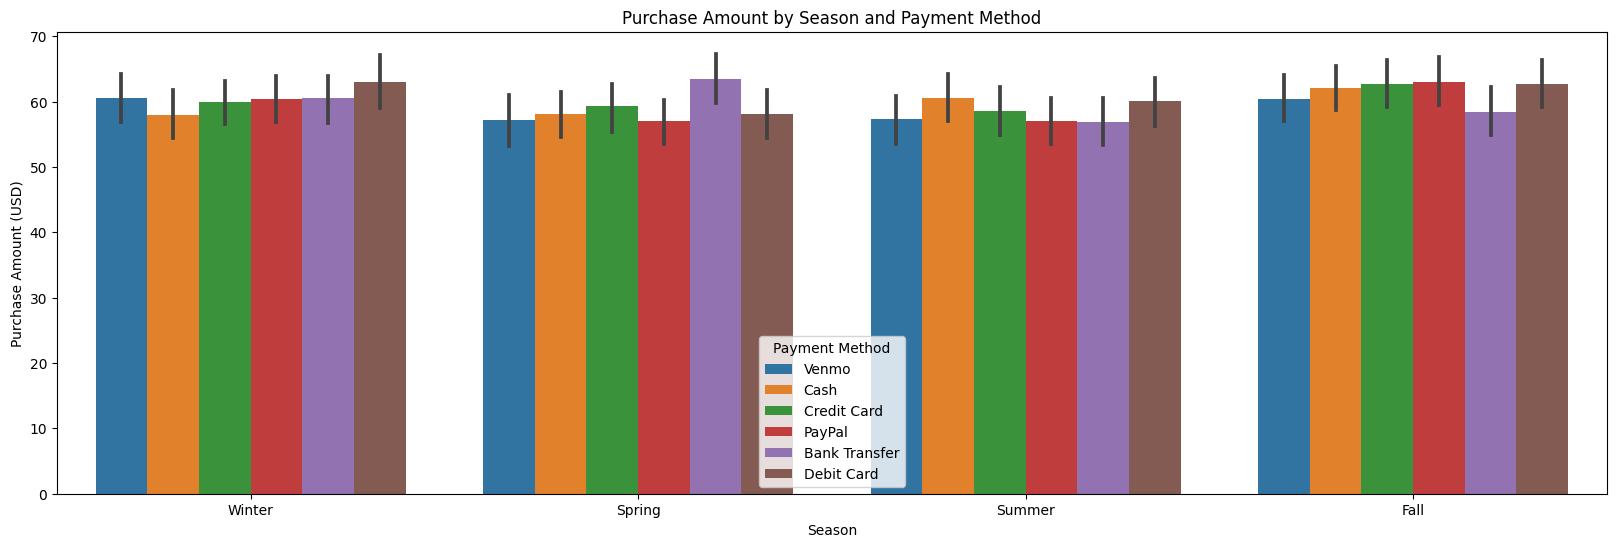

In [31]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

1. The purchase of products in the **winter** season is mostly done using the **debit card** payment method.
2. The purchase of products in the **spring** season is mostly done using the **bank transfer** payment method.
3. The purchase of products in the ***summer*** season is mostly done using the **cash** payment method.
4. The purchase of products in the **fall** season is mostly done using the **debit card** payment method

# Review Rating by Gender

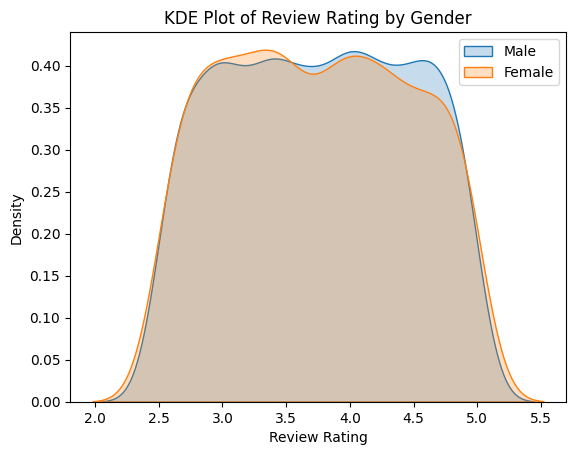

In [32]:
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()